## US Political Polarisation in 2014
#### Note: While my original intention was to showcase the changes in the US's political polarisation from the 1990s to the 2010s, the data for earlier political surveys were not identified. This project is a compromised one with the limited avaiablity of data. The orignal data can be accessed at [Pew Research Center](https://www.pewresearch.org/politics/2014/06/12/political-polarization-in-the-american-public/)

In [2]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# reading the dataset
data = pd.read_spss('Data/Polarization_2014.sav')

In [4]:
# selecting the relevant columns
polarization = data[['partysum', 'ideoConsist']]

In [5]:
# since the project is focusing on the polarisation between the two parties, people with no obvious political preferences are excluded
polarization = polarization[polarization['partysum'] != 'No leaning']

In [6]:
polarization.describe(include='all')

,partysum,ideoConsist
count,8834,8834.000000
unique,2,NaN
top,Dem/ln D,NaN
freq,4657,NaN
mean,NaN,-0.498076
std,NaN,5.520814
min,NaN,-10.000000
25%,NaN,-5.000000
50%,NaN,0.000000
75%,NaN,4.000000


In [7]:
# splitting data into republican and democratic
rep = polarization[polarization['partysum'] == 'Rep/ln R']
dem = polarization[polarization['partysum'] == 'Dem/ln D']

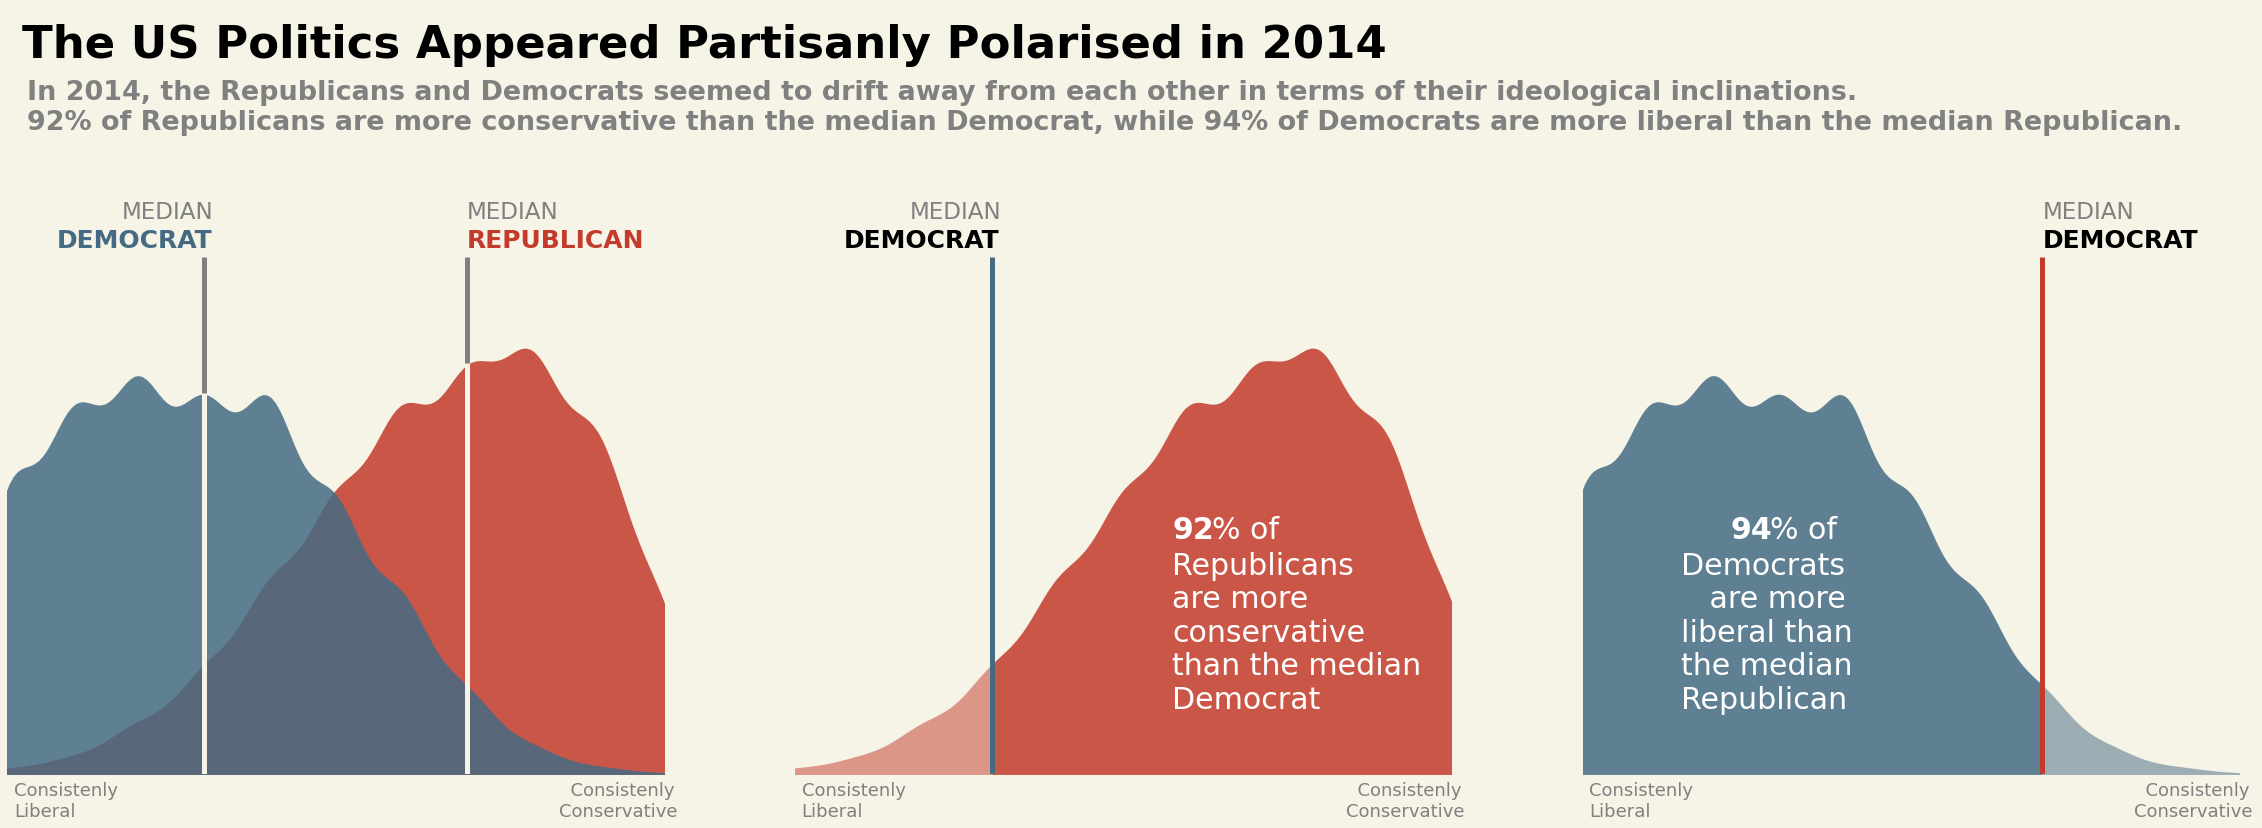

In [14]:
fig = plt.figure(figsize = (40, 10))

fig.patch.set_facecolor('#f6f3e7')

# draw the first subplot
ax1 = fig.add_subplot(131)

# draw the two kdes for both Rep and Dem
ax1 = sns.kdeplot(rep['ideoConsist'], fill = True, color = '#c33b2b', linewidth=0, alpha = 0.85, bw_adjust=1.15)
ax1 = sns.kdeplot(dem['ideoConsist'], fill = True, color = '#446b83', linewidth=0, alpha = 0.85, bw_adjust=1.15)

# set unnecessary elements invisible
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

for spine in ax1.spines.values():
    spine.set_visible(False)

# set the x-axis lim
ax1.set_xlim(-10, 10)

# add vertical lines to represent the Rep median
ax1.vlines(x = rep['ideoConsist'].median(), ymin = 0, ymax = 0.0875, linewidth = 5, color = '#f6f3e7')
ax1.vlines(x = rep['ideoConsist'].median(), ymin = 0.0875, ymax = 0.11, linewidth = 5, color = 'gray')

# add annotations
ax1.text(4, 0.118, 'MEDIAN', size = 23, color = 'gray')
ax1.text(4, 0.112, 'REPUBLICAN', size = 25, color = '#c33b2b', fontweight='bold')

# add vertical lines to represent the Dem median
ax1.vlines(x = dem['ideoConsist'].median(), ymin = 0, ymax = 0.082, linewidth = 5, color = '#f6f3e7')
ax1.vlines(x = dem['ideoConsist'].median(), ymin = 0.081, ymax = 0.11, linewidth = 5, color = 'gray')

# add annotations
ax1.text(-6.5, 0.118, 'MEDIAN', size = 23, color = 'gray')
ax1.text(-8.5, 0.112, 'DEMOCRAT', size = 25, color = '#446b83', fontweight='bold')

# add text annotations for political inclinations
ax1.text(-9.8, -0.009, 'Consistenly \nLiberal', size = 18, color = 'gray')
ax1.text(6.8, -0.009, '  Consistenly \nConservative', size = 18, color = 'gray')

ax1.set_facecolor('#f6f3e7')

# draw the second subplot
ax2 = fig.add_subplot(132)

# draw the kde for Rep with different sections
ax2 = sns.kdeplot(rep['ideoConsist'], fill = True, color = '#c33b2b', linewidth=0, alpha = 0.5, bw_adjust=1.15, clip = (-np.inf, dem['ideoConsist'].median()))
ax2 = sns.kdeplot(rep['ideoConsist'], fill = True, color = '#c33b2b', linewidth=0, alpha = 0.85, bw_adjust=1.15, clip = (dem['ideoConsist'].median(), np.inf))

# set unnecessary elements invisible
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

# set the x-axis lim
ax2.set_xlim(-10, 10)

# add the vertical line to represent the Dem median
ax2.vlines(x = dem['ideoConsist'].median(), ymin = 0, ymax = 0.11, linewidth = 5, color = '#446b83')

# add text annotations
ax2.text(-6.5, 0.118, 'MEDIAN', size = 23, color = 'gray')
ax2.text(-8.5, 0.112, 'DEMOCRAT', size = 25, fontweight='bold')

ax2.text(1.5, 0.05, '92', size = 30, color = 'white', weight = 'bold')
ax2.text(2.7, 0.05, '% of', size = 30, color = 'white')
ax2.text(1.5, 0.014, '\nRepublicans\nare more\nconservative\nthan the median\nDemocrat', size = 30, color = 'white')

ax2.text(-9.8, -0.009, 'Consistenly \nLiberal', size = 18, color = 'gray')
ax2.text(6.8, -0.009, '  Consistenly \nConservative', size = 18, color = 'gray')

ax2.set_facecolor('#f6f3e7')

# draw the third subplot
ax3 = fig.add_subplot(133)

# draw the kde for Rep with different sections
ax3 = sns.kdeplot(dem['ideoConsist'], fill = True, color = '#446b83', linewidth=0, alpha = 0.85, bw_adjust=1.15, clip = (-np.inf, rep['ideoConsist'].median()))
ax3 = sns.kdeplot(dem['ideoConsist'], fill = True, color = '#446b83', linewidth=0, alpha = 0.5, bw_adjust=1.15, clip = (rep['ideoConsist'].median(), np.inf))

# set unnecessary elements invisible
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
for spine in ax3.spines.values():
    spine.set_visible(False)

# set the x-axis lim
ax3.set_xlim(-10, 10)

# add the vertical line to represent the Rep median
ax3.vlines(x = rep['ideoConsist'].median(), ymin = 0, ymax = 0.11, linewidth = 5, color = '#c33b2b')

# add text annotations
ax3.text(4, 0.118, 'MEDIAN', size = 23, color = 'gray')
ax3.text(4, 0.112, 'DEMOCRAT', size = 25, fontweight='bold')

ax3.text(-5.5, 0.05, '94', size = 30, color = 'white', weight = 'bold')
ax3.text(-4.3, 0.05, '% of', size = 30, color = 'white')
ax3.text(-7, 0.014, '\nDemocrats\n   are more\nliberal than\nthe median\nRepublican', size = 30, color = 'white')

ax3.text(-9.8, -0.009, 'Consistenly \nLiberal', size = 18, color = 'gray')
ax3.text(6.8, -0.009, '  Consistenly \nConservative', size = 18, color = 'gray')

ax3.set_facecolor('#f6f3e7')

# add a small margin at the top, kinda silly approach
fig.text(0.13, 1.18, '    ')

fig.text(0.13, 1.12, 'The US Politics Appeared Partisanly Polarised in 2014', size = 45, weight = 'bold')
fig.text(0.132, 1.02, 'In 2014, the Republicans and Democrats seemed to drift away from each other in terms of their ideological inclinations.\n92% of Republicans are more conservative than the median Democrat, while 94% of Democrats are more liberal than the median Republican.', 
         size = 27, weight = 'bold', color = 'gray')


plt.show()